<a href="https://colab.research.google.com/github/whistle-hikhi/K-Means-clustering/blob/main/divisive_hierarchical_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!nvidia-smi

Thu Mar 27 07:05:32 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   52C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [4]:
%load_ext cuml.accel

[2025-03-27 07:06:02.931] [CUML] [info] cuML: Installed accelerator for sklearn.
[2025-03-27 07:06:33.183] [CUML] [info] cuML: Installed accelerator for umap.
[2025-03-27 07:06:33.312] [CUML] [info] cuML: Installed accelerator for hdbscan.
[2025-03-27 07:06:33.312] [CUML] [info] cuML: Successfully initialized accelerator.


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.cluster import KMeans

In [6]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
subset_size = 1000
X_subset = X[:subset_size] / 255.0
y_subset = y[:subset_size]

In [7]:
def divisive_clustering(data, n_clusters, current_labels=None):
  if current_labels is None:
    current_labels = np.zeros(len(data), dtype=int)
  if len(np.unique(current_labels)) >= n_clusters:
    return current_labels

  unique_labels, counts = np.unique(current_labels, return_counts=True)
  largest_cluster = unique_labels[np.argmax(counts)]
  cluster_data = data[current_labels == largest_cluster]

  kmeans = KMeans(n_clusters=n_clusters)
  sub_labels = kmeans.fit_predict(cluster_data)

  new_labels = current_labels.copy()
  mask = (current_labels == largest_cluster)
  new_labels[mask] = sub_labels + largest_cluster * 2

  return divisive_clustering(data, n_clusters, current_labels=new_labels)


In [9]:
%%time
labels = divisive_clustering(X_subset, n_clusters=10)

CPU times: user 143 ms, sys: 1.88 ms, total: 145 ms
Wall time: 158 ms


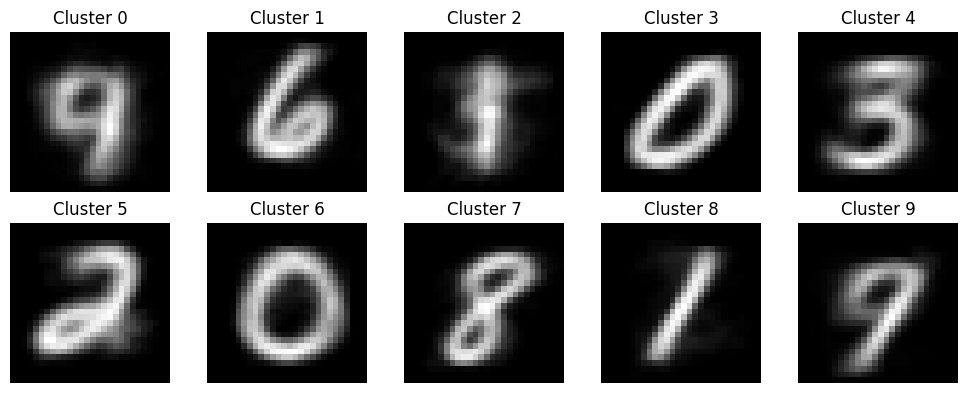

In [11]:
fig, axes = plt.subplots(2, 5, figsize=(10,4))
for i, ax in enumerate(axes.flat):
  cluster_points = X_subset[labels == i]
  if len(cluster_points) > 0:
    centroid = np.mean(cluster_points, axis=0).reshape(28, 28)
    ax.imshow(centroid, cmap='gray')
    ax.axis('off')
    ax.set_title(f'Cluster {i}')

plt.tight_layout()
plt.show()